<a href="https://colab.research.google.com/github/ElisabethKugler/EK-ML-Python/blob/main/EK_Tensorflow_ImageClassification_withAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification with Augmentation: 
from the Udacity Course "Introduction to Tensorflow" - https://github.com/tensorflow/examples
use Google Colab "https://colab.research.google.com/?utm_source=scs-index"

In [4]:
### Import Packages
import os # read files and directory structure
import numpy as np
import glob # used to retrieve files/pathnames matching a specified pattern
import shutil # high-level operations w glob - such as wild cards
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
### Data Loading
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']


In [5]:
# prints the total number of flower images we have for each type of flower
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  num_train = int(round(len(images)*0.8))
  train, val = images[:num_train], images[num_train:]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))
round(len(images)*0.8)

roses: 641 Images


Error: ignored

In [6]:
# set up the path for the training and validation sets
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [7]:
### DATA AUGMENTATION
batch_size = 100
IMG_SHAPE = 150 

# use the ImageDataGenerator
image_gen_train = ImageDataGenerator(
                    rescale=1./255, # correct for 0-255 to be 0-1
                    rotation_range=45, # random 45 degree rotation
                    width_shift_range=.15, # width shift of 0.15
                    height_shift_range=.15,  # height shift of 0.15
                    horizontal_flip=True, # random horizontal flip 
                    zoom_range=0.5 # random zoom of up to 50%
                    )

# use the .flow_from_directory method to apply the above transformation to the images in our training set
train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

Found 2935 images belonging to 5 classes.


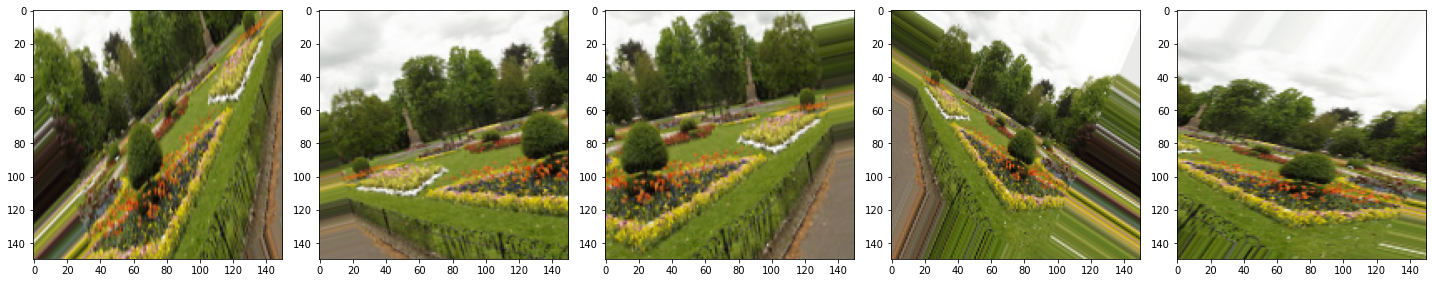

In [8]:

# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

# plot 5 augmented images
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [9]:
#  Create a Data Generator for the Validation Set 
# Generally, we only apply data augmentation to our training examples
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 735 images belonging to 5 classes.


In [10]:
### Create the CNN
model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(5))

In [11]:
### Compile the Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
### Train the Model
# !! fit_generator function because we are using the ImageDataGenerator class to generate batches of training and validation data
epochs = 12

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/12
30/30 [==============================] - 95s 3s/step - loss: 1.6429 - accuracy: 0.2934 - val_loss: 1.2212 - val_accuracy: 0.4680
Epoch 2/12
30/30 [==============================] - 89s 3s/step - loss: 1.1959 - accuracy: 0.5029 - val_loss: 1.0544 - val_accuracy: 0.5823
Epoch 3/12
30/30 [==============================] - 88s 3s/step - loss: 1.1258 - accuracy: 0.5458 - val_loss: 1.0490 - val_accuracy: 0.5810
Epoch 4/12
30/30 [==============================] - 88s 3s/step - loss: 1.0566 - accuracy: 0.5741 - val_loss: 0.9623 - val_accuracy: 0.6150
Epoch 5/12
30/30 [==============================] - 90s 3s/step - loss: 0.9886 - accuracy: 0.6136 - val_loss: 0.9232 - val_accuracy: 0.6313
Epoch 6/12
30/30 [==============================] - 88s 3s/step - loss: 0.9732 - accuracy: 0.6293 - val_loss: 0.9313 - val_accuracy: 0.6163
Epoch 7/12
30/30 [==============================] - 90s 3s/step - loss: 0.9482 - accuracy: 0.6337 - val_loss: 0.9827 - val_accuracy: 0.6014
Epoch 8/12
30/30 [==

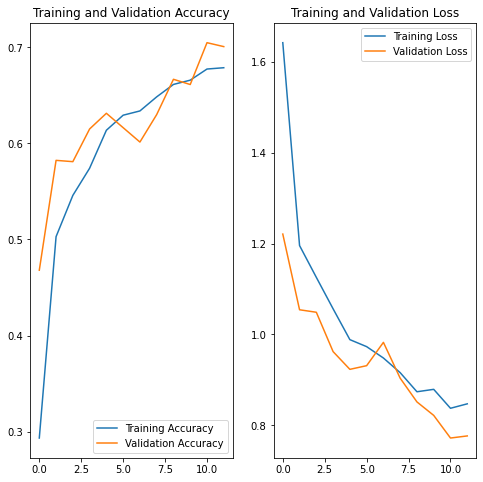

In [13]:
### Plot Training and Validation Graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()